In [ ]:
import numpy as np
import matplotlib.pyplot as plt

High = [50 , 100 , 150 , 200 , 300 , 400 , 700 , 800]
Low = [200 , 400 , 600 , 800 , 1000 , 1200 , 1600 , 2000 , 2500]

Amplitude = []
Udspændt = []


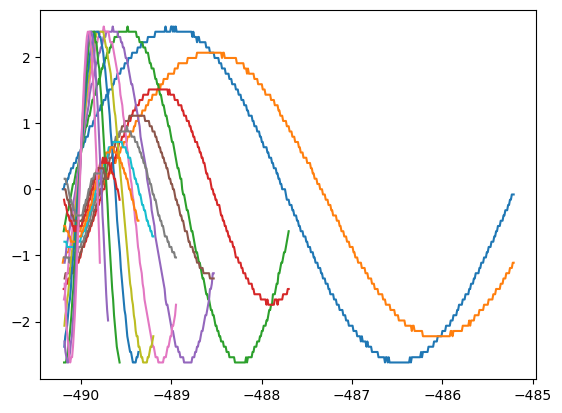

In [ ]:
for Hz in Low:
    Rådata = np.genfromtxt(f"LOWPASS-{Hz}Hz.csv" , delimiter=',' , skip_header=2)
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2]

    Periode = 1 / Hz * 10**3
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    SvingA = []
    SvingB = []
    for i in range(0,int(Antal_svingninger)):
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])

    Amp = []
    Ud = []
    for x in range(0,int(Antal_svingninger)):
        Amp.append(np.max(SvingB[x][1]))
        Ud.append(np.max(SvingA[x][1]))


    Udspændt.append([Hz , np.mean(Ud) , np.std(Ud)])
    Amplitude.append([Hz , np.mean(Amp) , np.std(Amp)])

In [ ]:

kopiB = Amplitude.copy()
kopiA = Udspændt.copy()




In [ ]:
def higpass_g(n):
    R = 10*10**3
    C = 47*10**(-9)
    g = (2*np.pi*n*R*C)/(np.sqrt((2*np.pi*n*R*C)**2 +1))
    return g

xxx = np.linspace(50,800, 1000)
yyy = higpass_g(xxx)



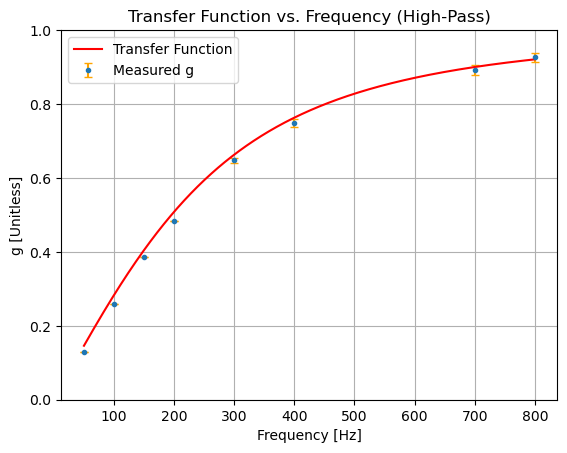

In [ ]:
x = []
y = []
u = []

for k in range(len(kopiA)):
    x.append(kopiB[k][0])
    y.append(kopiB[k][1]/kopiA[k][1])
    u.append( np.sqrt( (1/kopiA[k][1] * kopiB[k][2])**2 + ( -kopiB[k][1]/(kopiA[k][1])**2 * kopiA[k][2] )**2 ))


plt.errorbar(x,y,u , fmt='.' , label='Measured g' , ecolor='orange' , capsize=3)
plt.plot(xxx,yyy, label = 'Transfer Function', color='red')
plt.legend(loc='upper left',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Transfer Function vs. Frequency (High-Pass)')
plt.ylabel('g [Unitless]', fontsize = 10);
plt.ylim(0,1)
plt.grid()

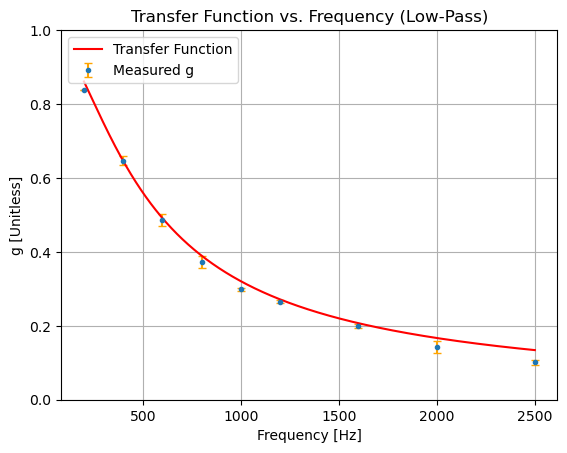

In [ ]:
def lowpass_g(n):
    R = 10*10**3
    C = 47*10**(-9)
    g = 1/(np.sqrt((2*np.pi*n*R*C)**2 +1))
    return g

xxx = np.linspace(200,2500, 1000)
yyy = lowpass_g(xxx)

x = []
y = []
u = []

for k in range(len(kopiA)):
    x.append(kopiB[k][0])
    y.append(kopiB[k][1]/kopiA[k][1])
    u.append( np.sqrt( (1/kopiA[k][1] * kopiB[k][2])**2 + ( -kopiB[k][1]/(kopiA[k][1])**2 * kopiA[k][2] )**2 ))


plt.errorbar(x,y,u , fmt='.' , label='Measured g' , ecolor='orange' , capsize=3)
plt.plot(xxx,yyy, label = 'Transfer Function', color='red')
plt.legend(loc='upper left',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Transfer Function vs. Frequency (Low-Pass)')
plt.ylabel('g [Unitless]', fontsize = 10);
plt.ylim(0,1)
plt.grid()

# Faseforskydning

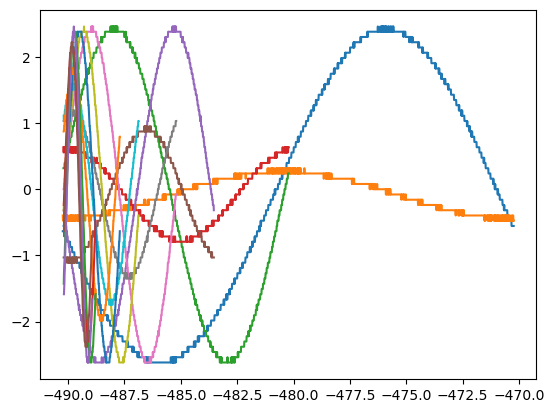

In [ ]:
Faseforskydning = []

for Hz in High:
    Rådata = np.genfromtxt(f"HIGHPASS-{Hz}Hz.csv" , delimiter=',' , skip_header=2)
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2]

    Periode = 1 / Hz * 10**3
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    SvingA = []
    SvingB = []
    for i in range(0,int(Antal_svingninger)):
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])

    For = []
    for x in range(0,int(Antal_svingninger)):
        For.append(  abs( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )

    Faseforskydning.append([Hz , np.mean(For) , np.std(For)])

In [ ]:
kopiA = Faseforskydning.copy()


In [ ]:
def Highpass_Theta(n):
    R = 10*10**3
    C = 47*10**(-9)
    return np.arctan(1 / (2*np.pi*R*C*n) )

xxx = np.linspace(1,800, 1000)
yyy = Highpass_Theta(xxx)

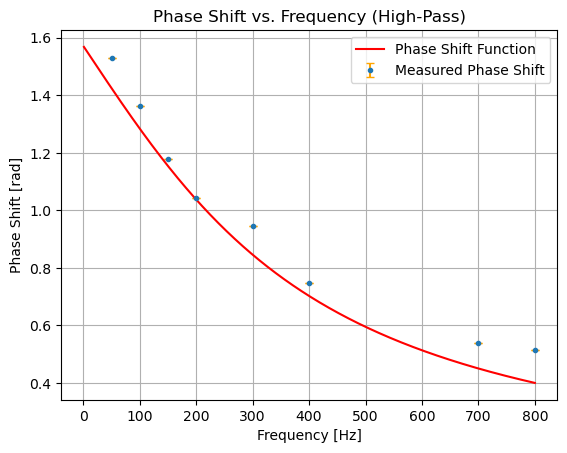

In [ ]:
x = []
y = []
u = []

for k in range(len(kopiA)):
    x.append(kopiA[k][0])
    y.append(kopiA[k][1])
    u.append(kopiA[k][2])


plt.errorbar(x,y,u , fmt='.' , label='Measured Phase Shift' , ecolor='orange' , capsize=3)
plt.plot(xxx,yyy, label = 'Phase Shift Function', color='red')
plt.legend(loc='upper right',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Phase Shift vs. Frequency (High-Pass)')
plt.ylabel('Phase Shift [rad]', fontsize = 10);

plt.grid()

In [ ]:
def Lowpass_Theta(n):
    R = 10*10**3
    C = 47*10**(-9)
    return -np.arctan(2*np.pi*n*R*C)

xxx = np.linspace(200,2500, 1000)
yyy = Lowpass_Theta(xxx)

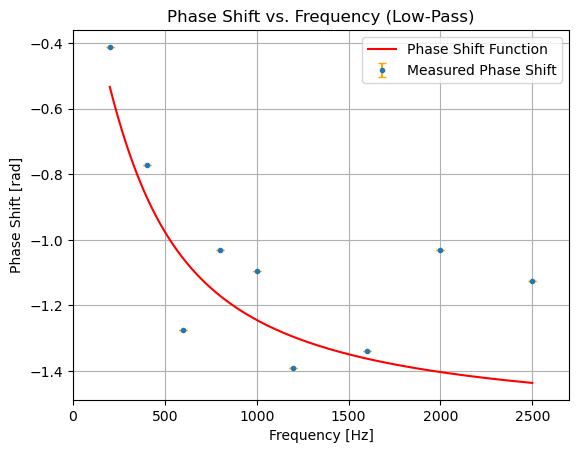

In [ ]:
x = []
y = []
u = []

for k in range(len(kopiA)):
    x.append(kopiA[k][0])
    y.append(kopiA[k][1])
    u.append(kopiA[k][2])


plt.errorbar(x,y,u , fmt='.' , label='Measured Phase Shift' , ecolor='orange' , capsize=3)
plt.plot(xxx,yyy, label = 'Phase Shift Function', color='red')
plt.legend(loc='upper right',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Phase Shift vs. Frequency (Low-Pass)')
plt.ylabel('Phase Shift [rad]', fontsize = 10);

plt.xlim(0,2700)
plt.grid()